# 크롤링

크롤링하기 위해 설치해야 하는 것과 방법 정리

#### 유튜브 댓글 단어 빈도수 시각화,  토픽 뽑기


In [1]:
!pip install selenium

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
#설치 sh 스크립트를 사용하여 필요한 라이브러리 등을 설치
!curl https://intoli.com/install-google-chrome.sh | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9526  100  9526    0     0  73844      0 --:--:-- --:--:-- --:--:-- 73844
Working in /tmp/google-chrome-installation
/tmp/google-chrome-installation /home/ec2-user/SageMaker
Configuring the Google Chrome repo in /etc/yum.repos.d/google-chrome.repo
Loaded plugins: dkms-build-requires, priorities, update-motd, upgrade-helper,
              : versionlock
amzn-main                                                | 2.1 kB     00:00     
amzn-updates                                             | 3.8 kB     00:00     
google-chrome                                            | 1.3 kB     00:00     
Package wget-1.18-5.30.amzn1.x86_64 already installed and latest version
Nothing to do
--2020-12-18 01:36:16--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 216.58.192.238, 2607:f8b0:4009:815:

In [3]:
#설치 확인, 버전을 확인해 두도록 한다.
!/usr/bin/google-chrome-stable --version

Google Chrome 87.0.4280.88 


In [4]:
#심볼릭 림크로 크로뮴 경로 설정
!sudo ln -s /usr/bin/google-chrome-stable /usr/bin/chromium

ln: failed to create symbolic link ‘/usr/bin/chromium’: File exists


In [5]:
#chrome driver 홈페이지에서 다운로드, 위의 chrome 버전과 아래 드라이버 버전이 다를경우 충돌할 수 있으니 확인
!wget https://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_linux64.zip
# 현재 폴더에 압축 해재
!unzip chromedriver_linux64.zip -d .
#압축 파일 삭제
!rm chromedriver_linux64.zip
#드라이버 파일 이동
!sudo mv chromedriver /usr/bin/

--2020-12-18 01:36:26--  https://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 172.217.6.112, 2607:f8b0:4009:80f::2010
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|172.217.6.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5456932 (5.2M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   5.20M  14.3MB/s    in 0.4s    

2020-12-18 01:36:26 (14.3 MB/s) - ‘chromedriver_linux64.zip’ saved [5456932/5456932]

Archive:  chromedriver_linux64.zip
  inflating: ./chromedriver          


In [6]:
!ls

00. Basic			 auto-stop-idle.log
01.Pandas_Basic			 Data Analysis
02.Titanic			 lost+found
03.Visualization		 selenium-chrome-chromedriver install.ipynb
04.Simple Classification	 Untitled1.ipynb
05.Clustering			 Untitled.ipynb
06.Amazon Cloud Service Example


## Selenium

In [7]:
import selenium #웹 페이지에 대한 테스트를 하기 위해서 코드로 인위의 동작을 구현. 크롤링할 때도 이용. 자료를 모아줌

In [8]:
from selenium import webdriver

In [9]:
opt = webdriver.ChromeOptions()
# 옵션을 제대로 지정안하면 실행에 실패할 수 있음으로 주의, 현재 headless 까지만 옵션으로 주어도 실행해도 된다.
opt.add_argument('--headless')
# opt.add_argument('--no-sandbox')
# opt.add_argument('--disable-dev-shm-usage')

In [10]:
driver = webdriver.Chrome(executable_path='chromedriver',options=opt)
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="76505001bdaf04017122acc8626210d7")>

'<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta charset="UTF-8"><link href="/manifest?pwa=webhp" crossorigin="use-credentials" rel="manifest"><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp" name="robots"><meta content="/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif" itemprop="image"><title>Google</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.GhYSaDTWhs4.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_CcmyUNBPTBtz4hsH0C6OHKqodVQ/cb=gapi.loaded_0" nonce="JOiBNBdDiX/5Y5+Ut5K2hw==" async=""></script><script nonce="JOiBNBdDiX/5Y5+Ut5K2hw==">(function(){window.google={kEI:\'ogfcX_i4KNW4tQaynYrwCQ\',kEXPI:\'31\',kBL:\'ZWEf\'};google.sn=\'webhp\';google.kHL=\'en\';})();(function(){\ngoogle.lc=[];google.li=0;google.get
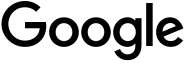

In [11]:
driver.get('https://google.com') #구글 페이지 소스 불러오기
driver.page_source

In [12]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [13]:
url = "https://www.youtube.com/watch?v=aLJMEs_9ZZE"

In [14]:
opt = webdriver.ChromeOptions() #옵션 지정
opt.add_argument('--headless') #리소스 낭비 줄이고자 창을 안 보이게
driver = webdriver.Chrome(executable_path='chromedriver', options=opt)

In [15]:
#코드를 사용자 행동처럼 모방해서 소스 긁어오기
SCROLL_RETRY_TIME = 0.5 #이걸 넘으면 행동 중단
RENEWAL_END_TIME = 5

## BeautifulSoup

In [16]:
!pip install BeautifulSoup4

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [17]:
from bs4 import BeautifulSoup #문서를 읽고 자료를 정리해줌

driver.get(url)

In [18]:
import time
SCROLL_PAUSE_TIME = .5 #대기하는 시간. 사용자 행동을 모방하기 때문에

body= driver.find_element_by_tag_name('body') #우리에게 보이는 부분 body
while True:
    last_height = driver.execute_script('return document.documentElement.scrollHeight') #자바스크립트. 창 크기. 
    for i in range(30):
        body.send_keys(Keys.END)
        time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script('return document.documentElement.scrollHeight')
    
    if new_height == last_height: #마지막 댓글을 찾기 위한 루프
         break;
       

In [19]:
page = driver.page_source
soup = BeautifulSoup(page, 'lxml') #간단히 해석

### Selection

In [20]:
user_names = list(map(lambda x: x.text.strip(), soup.select('#author-text > span'))) #셀렉션: 간단한 복사방법
user_comments = list(map(lambda x: x.text.strip(), soup.select('#content-text')))
user_date = list(map(lambda x: x.text.strip(), soup.select('#header-author > yt-formatted-string > a')))

In [21]:
len(user_names), len(user_comments),len(user_date)

(1580, 1580, 1580)

In [22]:
import pandas as pd
youtube = pd.DataFrame({
    'USER_NAME': user_names,
    'USER_COMMENT':user_comments,
    'DATE':user_date
})
youtube.head()

,USER_NAME,USER_COMMENT,DATE
0,ZedKay,It's like Hermione's never-ending bag,6 months ago
1,Lauren Valencia,Emma is literally my expectation for adult Her...,2 months ago
2,T M,She. \nHasn’t .\nAged.\nA .\nBit.,2 months ago
3,Slytherin_Alika,"Everyone: Gucci, Chanel, Louis Vuitton etc\nEm...",1 month ago
4,Millie Denton,why can't all British people have her accent.....,3 months ago


## LDA

In [23]:
import sklearn
from sklearn.decomposition import LatentDirichletAllocation #LDA: 어떤 단어가 있을 때 특정 단어를 연상시킬 확률
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
youtube['USER_COMMENT']=youtube['USER_COMMENT'].map(lambda x: x.lower()) #영어일 경우에 소문자로 통일
youtube

,USER_NAME,USER_COMMENT,DATE
0,ZedKay,it's like hermione's never-ending bag,6 months ago
1,Lauren Valencia,emma is literally my expectation for adult her...,2 months ago
2,T M,she. \nhasn’t .\naged.\na .\nbit.,2 months ago
3,Slytherin_Alika,"everyone: gucci, chanel, louis vuitton etc\nem...",1 month ago
4,Millie Denton,why can't all british people have her accent.....,3 months ago
...,...,...,...
1575,John Delos Reyes,“i’m emma watson”\n\nbro i immediately flashed...,1 year ago
1576,Myra,“viiiitamins” 😂💕 love her,1 year ago
1577,Arap Ludin,hello granger,6 months ago
1578,CMSs8,she’s just so elegant! she exudes feminine bea...,1 year ago


In [25]:
import re
youtube['USER_COMMENT']=youtube['USER_COMMENT'].map(lambda x: re.sub('[^a-z0-9 \']','',x))
#youtube['USER_COMMENT']=youtube['USER_COMMENT'].map(lambda x: re.sub('[^가-힣a-z0-9 \']','',x))b - 한글일 때

In [26]:
count_vectorizer = CountVectorizer(stop_words='english') #특정 단어 개수 세주기
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
count_data = count_vectorizer.fit_transform(youtube['USER_COMMENT'])
count_data

<1580x2278 sparse matrix of type '<class 'numpy.int64'>'
	with 7862 stored elements in Compressed Sparse Row format>

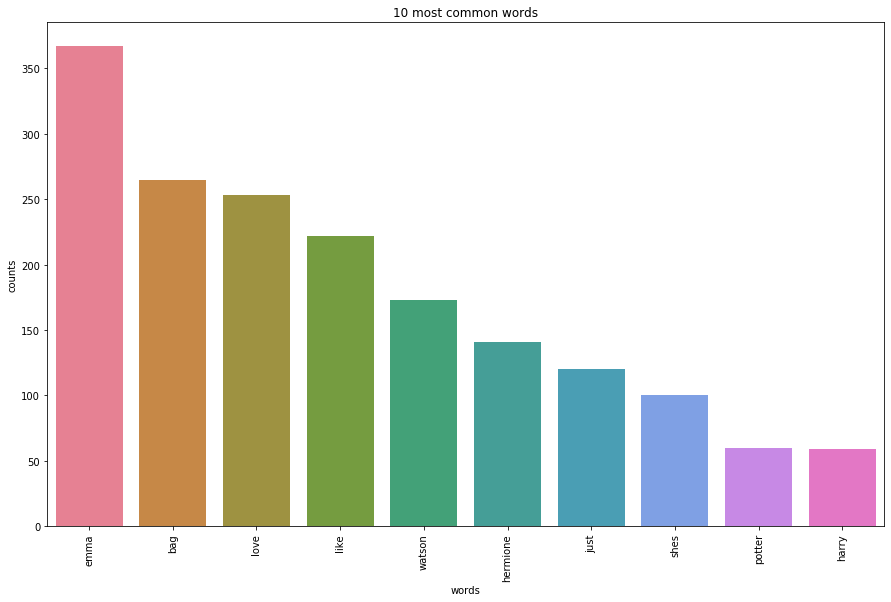

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
words = count_vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

### topic 뽑기 (연상되는 단어)

In [29]:
num_topics = 5
lda= LatentDirichletAllocation(n_components=num_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [30]:
def print_topics(model, cont_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\Topic #%d:" % topic_idx)
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words -1:-1]]))

In [31]:
num_words=5
print(print_topics(lda,count_vectorizer, num_words))

\Topic #0:
emma, pop, rocks, like, asmr
\Topic #1:
bag, like, looks, hogwarts, bottle
\Topic #2:
love, emma, watson, like, bag
\Topic #3:
bag, like, emma, just, hermione
\Topic #4:
hermione, potter, harry, emma, bag
None


In [32]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6 MB 5.9 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7e5a6612d665e5853e2af09105beb9ae84bf8c654391adf553017668b79cbd16
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/de/11/0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
Successfully built pyLDAvis
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [33]:
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis

In [34]:
ldavis = pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)

In [35]:
pyLDAvis.display(ldavis)